A quick look at annual returns over the 100+ years of daily data that we have on dow jones

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import quandl
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

sdate = pd.Timestamp("2017-01-01")

dj = pd.read_csv("../Data/DjiaHist.csv", index_col = "Date")
dj.index = pd.to_datetime(dj.index)
dj.sort_index(ascending=True, inplace=True)
dj.rename(columns={"Value" : "value"}, inplace=True)
dia = quandl.get("YAHOO/INDEX_DJI", authtoken="ZW3mrFD6ft-vHhH_Fs1y")
dia.rename(columns={"Close":"price"}, inplace=True)
dia.drop(["Open", "High", "Low", "Volume", "Adjusted Close"], axis=1, inplace=True)
dia = dia.loc[sdate:]

NotFoundError: (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.

First cleaning up the data, especially the DateTime part. Also adding day of the year into the df in order to sort all returns base of the day of the year and plot it all at once

In [61]:
dj["pct"] = np.log(dj["value"]).diff()
dj["year"] = dj.index.year
dj["day"] = dj.index.dayofyear

dia["day"] = dia.index.dayofyear
dia["pct"] = np.log(dia["price"]).diff()
dia.set_index(dia["day"], inplace = True)
dia.fillna(0, inplace=True)

Pivoting the returns table, so that we get returs for all years and all days of the year

In [62]:
daily_rets = pd.pivot_table(dj, index=["day"], columns=["year"], values=["pct"])
#daily_rets.convert_objects(convert_numeric = True)
#pd.to_numeric(daily_rets, inplace=True)
daily_rets.fillna(0, inplace = True)
daily_rets.columns = daily_rets.columns.droplevel()
daily_rets.drop(2016, axis =1, inplace = True)
daily_rets.rename(columns = lambda x: str(x), inplace=True)

daily_rets.head(8)

year,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
day,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.007144,0.000000,0.000000,0.030552,-0.003826,-0.003724,0.004810,-0.035862,0.000000,...,0.000000,0.000000,-0.016790,0.029006,0.000000,0.000000,0.000000,0.023263,-0.008196,0.000556
3,0.0,0.000000,-0.002026,-0.001819,-0.022563,-0.035695,-0.001089,0.000774,0.000000,0.011143,...,0.012048,0.000912,0.000978,0.000000,0.000000,0.008021,0.014611,-0.001581,0.001740,0.000000
4,0.0,-0.009123,-0.008145,0.004624,0.008074,0.019811,0.005278,0.000000,0.008198,-0.002418,...,0.003014,0.000494,-0.019844,0.000000,0.014840,0.001749,0.001696,0.003269,0.000000,0.000000
5,0.0,0.012309,0.012597,0.003618,-0.006574,-0.024087,0.000000,0.011228,0.006676,0.000142,...,0.000184,-0.006647,0.000000,-0.009095,-0.001129,0.002709,-0.000219,0.000000,0.000000,-0.018755
6,0.0,0.001956,0.013038,-0.000821,-0.010397,0.000000,0.004788,0.007619,-0.021438,-0.011025,...,0.007065,0.000000,0.000000,0.006925,0.000157,-0.002184,-0.004503,0.000000,-0.002729,-0.007456
7,0.0,-0.001956,0.009717,0.008019,0.000000,-0.008309,-0.010533,-0.002279,0.001910,-0.003317,...,0.000000,0.000000,0.002131,-0.027598,0.003133,-0.001930,0.000000,-0.003797,0.006423,0.012180
8,0.0,0.002444,-0.000987,0.000000,0.005890,0.007865,0.010071,0.009087,0.015987,0.000000,...,0.000000,0.002053,-0.018762,-0.003111,0.001068,0.000000,0.000000,-0.004151,-0.004134,0.018221
9,0.0,-0.001710,0.000000,0.010217,-0.021614,-0.001775,-0.012253,-0.001811,0.002085,0.004180,...,0.004787,-0.000555,0.011549,-0.016525,0.000000,0.000000,0.002648,0.004615,-0.001093,-0.009567


Heres how it looks with all years plotted along with 2016

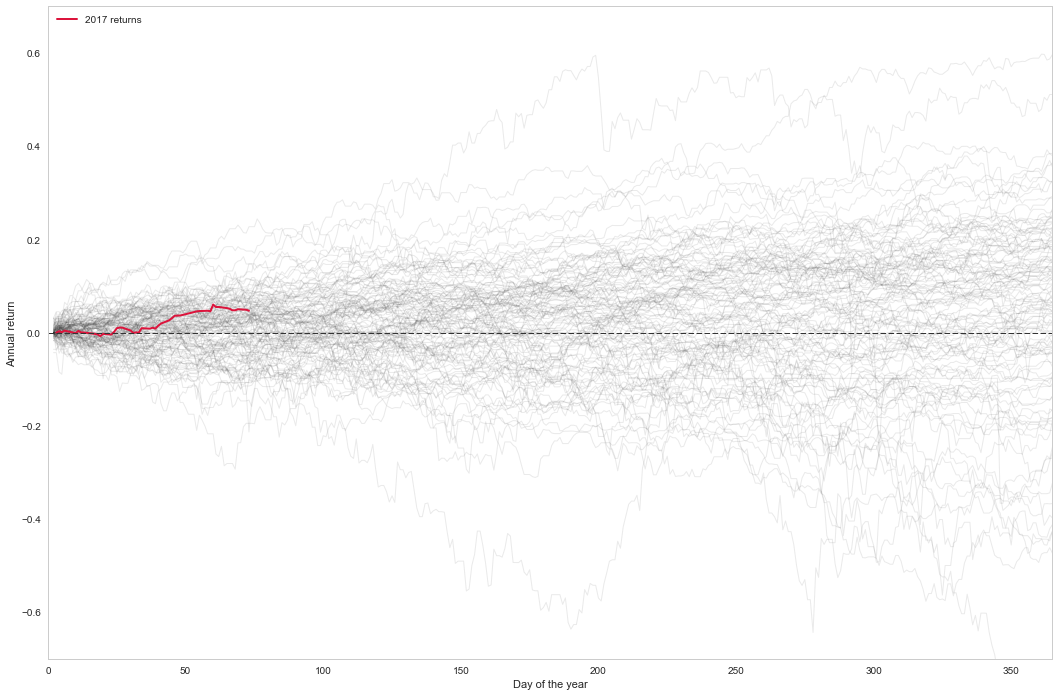

In [65]:
f, ax = plt.subplots(figsize=(18, 12))
ax.plot(daily_rets.cumsum(), color="#333333", linewidth=1, alpha=0.1, label=None)
ax.plot(dia["pct"].cumsum(), linewidth=2, color="crimson", label="2017 returns")
plt.grid(False)
plt.ylabel("Annual return")
plt.xlabel("Day of the year")
plt.ylim(-0.7, 0.7)
plt.xlim(0, 365)
plt.axhline(0, linewidth= 1, color="#333333", linestyle="--")
plt.legend(loc="upper left")

Adding the mean returns for all of all years so one can compare it all with 2016

(1, 365)

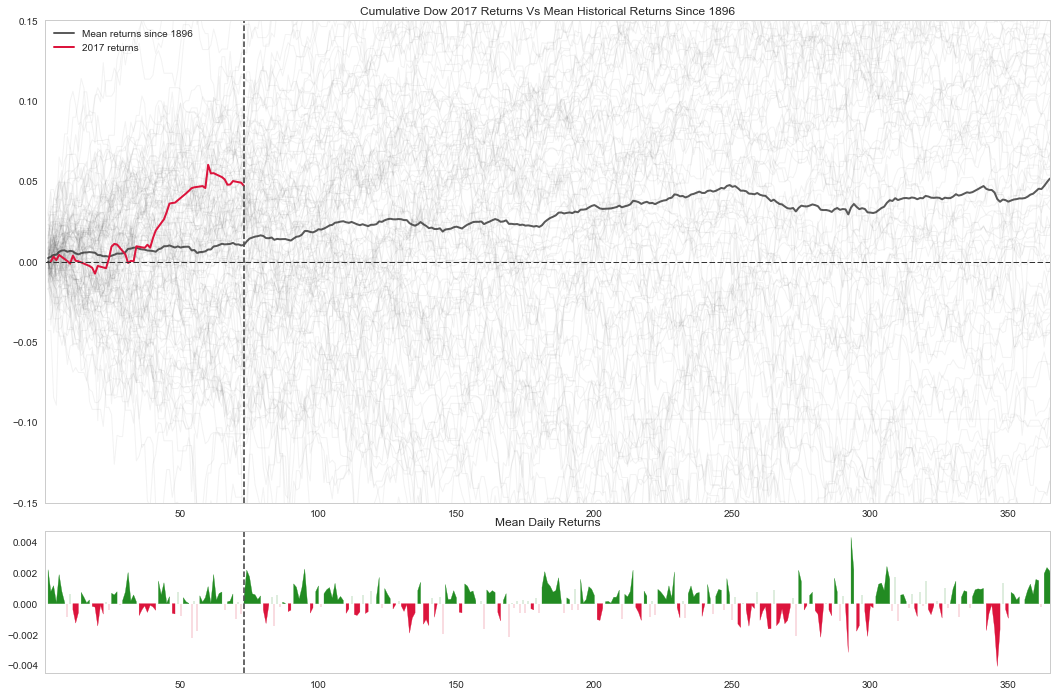

Its a right time to also look at returns on election years. Up to 1936 the votes were cast in early january, from there on the vote has been in early november, so i used returns from 1936 onward in the mean calc.

(1, 365)

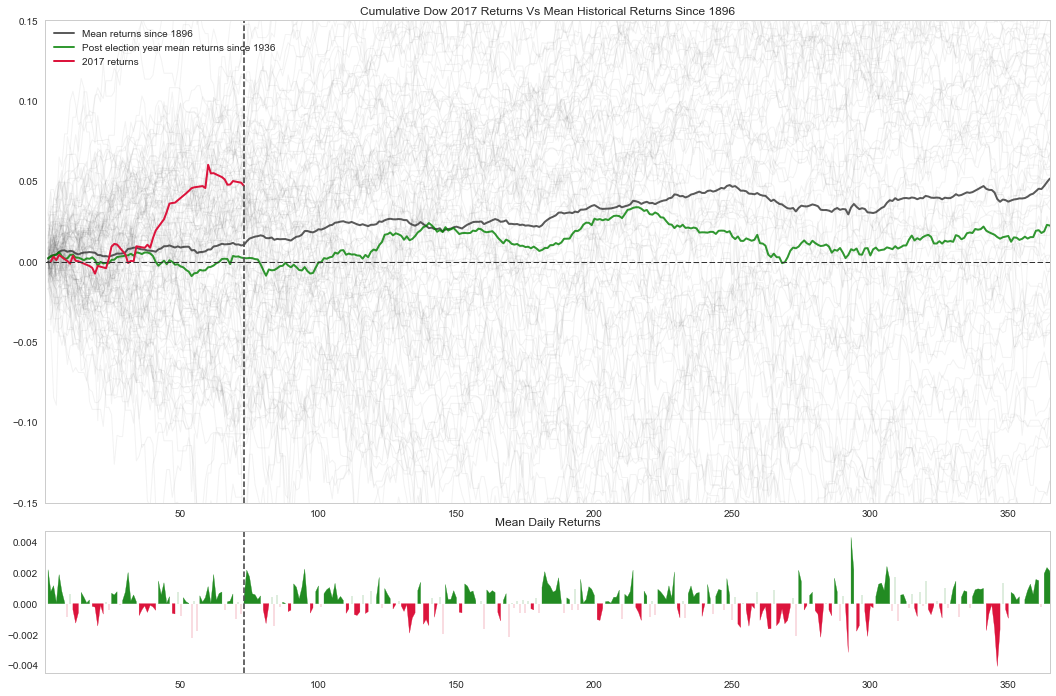

In [94]:


#ax.plot(daily_rets.index, daily_rets.cumsum(), color="#333333", linewidth=1, alpha=0.06, label=None)
#ax.plot(daily_rets["mean"].cumsum(), color="#333333", linewidth=2, alpha=0.8, label="Mean returns since 1896")
#ax.plot(daily_rets["el_year"].cumsum(), color="g", linewidth=2, alpha=0.8, label="Election year mean returns since 1936")


daily_rets["mean"] = daily_rets.mean(axis=1)
daily_rets["2016"] = dia["pct"]
daily_rets["el_year"] = daily_rets.loc[:, "1936"::4].mean(axis=1)
daily_rets["post_el"] = daily_rets.loc[:, "1937"::4].mean(axis=1)


plt.figure(figsize=(18, 12))

ax1 = plt.subplot2grid((4,1), (0,0), rowspan=3)
ax1.plot(daily_rets.index, daily_rets.cumsum(), color="#333333", linewidth=1, alpha=0.06, label=None)
ax1.plot(daily_rets["mean"].cumsum(), color="#333333", linewidth=2, alpha=0.8, label="Mean returns since 1896")
ax1.plot(daily_rets["post_el"].cumsum(), color="g", linewidth=2, alpha=0.8, label="Post election year mean returns since 1936")
ax1.plot(daily_rets["2016"].dropna().cumsum(), linewidth=2, color="crimson", label ="2017 returns")

plt.title("Cumulative Dow 2017 Returns Vs Mean Historical Returns Since 1896")
plt.axhline(0, linewidth= 1, color="#333333", linestyle="--")
plt.axvline(dia.index[-1], linestyle="--", color="#555555")
plt.ylim(-0.15, 0.15)
plt.grid(False)
plt.legend(loc="upper left")

ax2 = plt.subplot2grid((4,1), (3,0), rowspan=3, sharex=ax1)
ax2.fill_between(daily_rets.index, 0, daily_rets["mean"], where= daily_rets["mean"]<0, color="crimson")
ax2.fill_between(daily_rets.index, daily_rets["mean"], 0, where= daily_rets["mean"]>0, color="forestgreen")

plt.axvline(dia.index[-1], linestyle="--", color="#555555")
plt.title("Mean Daily Returns")
ax2.grid(False)
plt.xlim(1, 365)

We can also pull up decade returns. 80’s and 90’s were good times.

NameError: name 'rets_df' is not defined

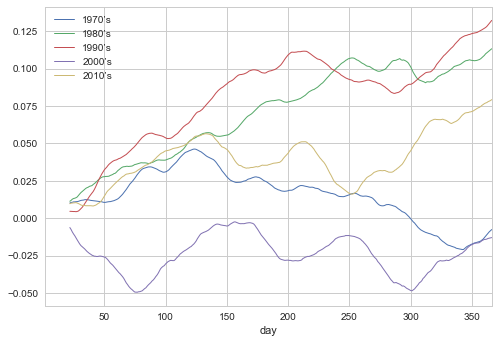

In [73]:
def decadeMean(start, end):
    return daily_rets.loc[:, start : end].cumsum().mean(axis=1)

decade_rets = pd.DataFrame({#"1900’s" : decadeMean("1900", "1909"),
                            #"1910’s" : decadeMean("1910", "1919"),
                            #"1920’s" : decadeMean("1920", "1929"),
                            #"1930’s" : decadeMean("1930", "1939"),
                            #"1940’s" : decadeMean("1940", "1949"),
                            #"1950’s" : decadeMean("1950", "1959"),
                            #"1960’s" : decadeMean("1960", "1969"),
                            "1970’s" : decadeMean("1970", "1979"),
                            "1980’s" : decadeMean("1980", "1989"),
                            "1990’s" : decadeMean("1990", "1999"),
                            "2000’s" : decadeMean("2000", "2009"),
                            "2010’s" : decadeMean("2010", "2015")
                           }, index= daily_rets.index)

mean_rets = decade_rets.rolling(21).mean()


plt.figure(figsize=(18, 12))
mean_rets.plot(linewidth=1)
rets_df["pct"].dropna().cumsum().rolling(21).mean().plot(color="crimson", linewidth=2, label="2016")
plt.legend(loc="upper left")
plt.ylabel("Annual return")
plt.xlabel("Day of the year")
plt.grid(False)

The most revealing thing about this to me, is that the day to day fluctuations havent really changed over 100+ years, market still behaves the same. For example, if we randomly reshuffle the order of daily returns of a year from 100 years ago and compare it to last years reshuffled returns, its impossible to say which one is which. The nature and behavior of day to day fluctuations is still the same.

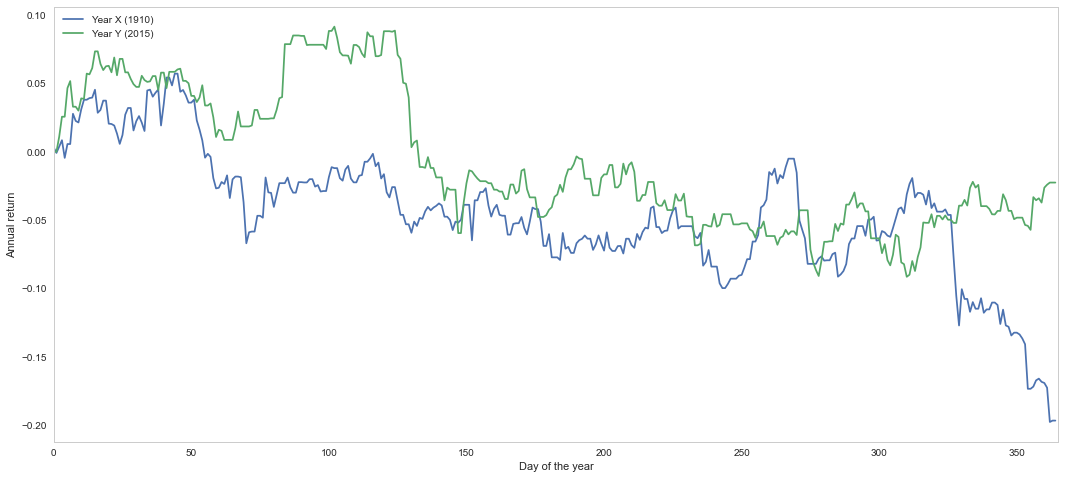

In [74]:
old = daily_rets["1910"]
new = daily_rets["2015"]

plt.figure(figsize=(18, 8))
plt.plot(np.random.permutation(old).cumsum(), label="Year X (1910)")
plt.plot(np.random.permutation(new).cumsum(), label="Year Y (2015)")
plt.legend(loc="upper left")
plt.xlim(0, 365)
plt.ylabel("Annual return")
plt.xlabel("Day of the year")
plt.grid(False)